<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [79]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa


### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [3]:
## Write your code here
df_filter = df[['Age', 'JobSatPoints_6']].dropna()
df_filter

,Age,JobSatPoints_6
1,35-44 years old,0.0
10,35-44 years old,25.0
12,35-44 years old,30.0
15,45-54 years old,0.0
18,25-34 years old,60.0
...,...,...
65178,45-54 years old,0.0
65218,25-34 years old,0.0
65265,18-24 years old,60.0
65351,25-34 years old,0.0


In [4]:
df_filter['Age'].unique()

array(['35-44 years old', '45-54 years old', '25-34 years old',
       '55-64 years old', '18-24 years old', 'Prefer not to say',
       '65 years or older', 'Under 18 years old'], dtype=object)

In [5]:
import numpy as np
map_age = {
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '25-34 years old': 29.5,
    '55-64 years old': 59.5,
    '18-24 years old': 21,
    'Prefer not to say': np.nan,
    '65 years or older': 67,
    'Under 18 years old': 17
}
df_filter['Age'] = df_filter['Age'].map(map_age)

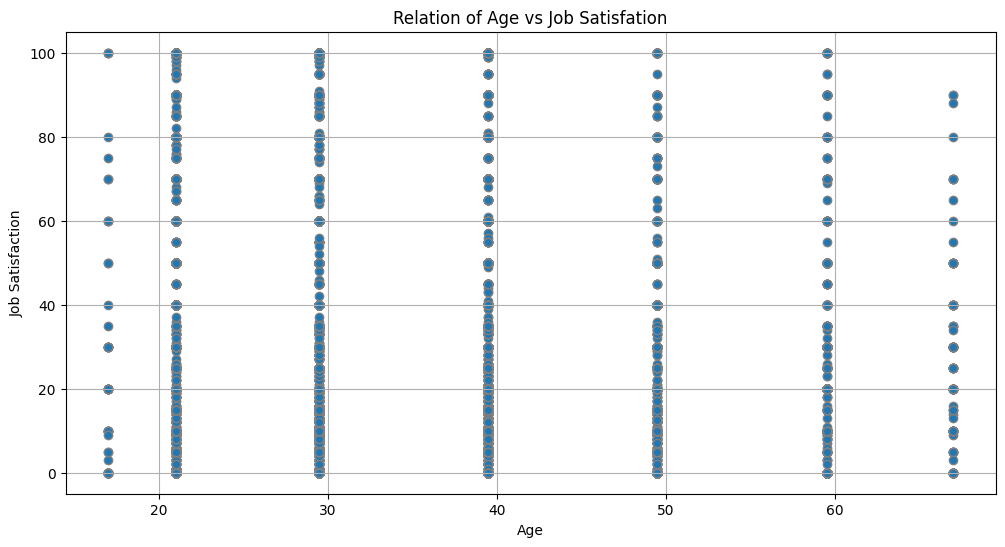

In [6]:
plt.figure(figsize=(12, 6))
plt.scatter(df_filter['Age'], df_filter['JobSatPoints_6'], marker='o', edgecolors='grey')
plt.title('Relation of Age vs Job Satisfation')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


In [7]:
## Write your code here
df_filter = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()
df_filter

,ConvertedCompYearly,JobSatPoints_6
72,7322.0,65.0
379,91295.0,0.0
389,110000.0,20.0
392,161044.0,30.0
398,195000.0,30.0
...,...,...
41178,9711.0,80.0
41180,44640.0,0.0
41184,170000.0,20.0
41186,12000.0,20.0


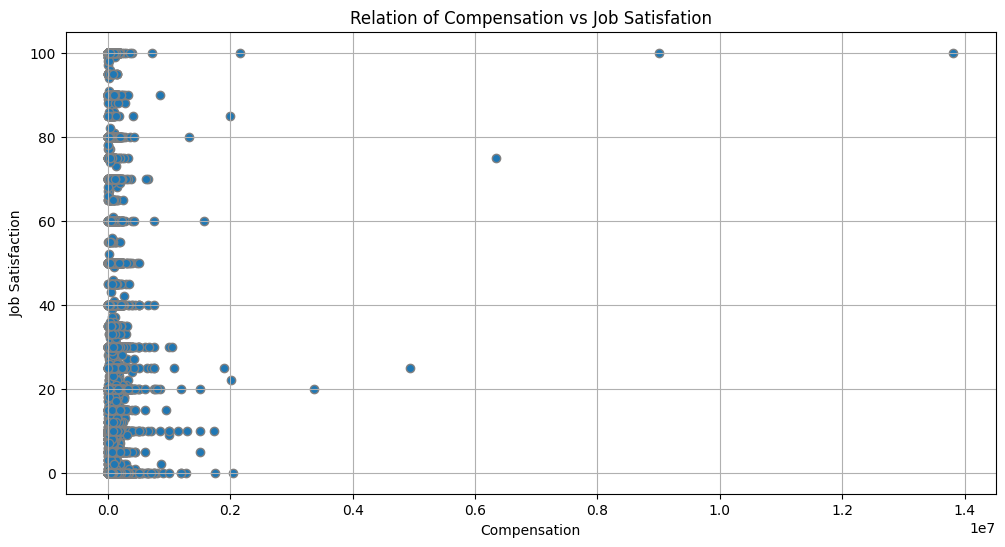

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(df_filter['ConvertedCompYearly'], df_filter['JobSatPoints_6'], marker='o', edgecolors='grey')
plt.title('Relation of Compensation vs Job Satisfation')
plt.xlabel('Compensation')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.show()

In [9]:
##Removing outliers
q1 = df_filter['ConvertedCompYearly'].quantile(0.25)
q3 = df_filter['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1
bound_low = q1 - 1.5*iqr
bound_hig = q3 + 1.5*iqr
df_wo_out = df_filter[(df_filter['ConvertedCompYearly'] <=bound_hig) & (df_filter['ConvertedCompYearly']>=bound_low)]

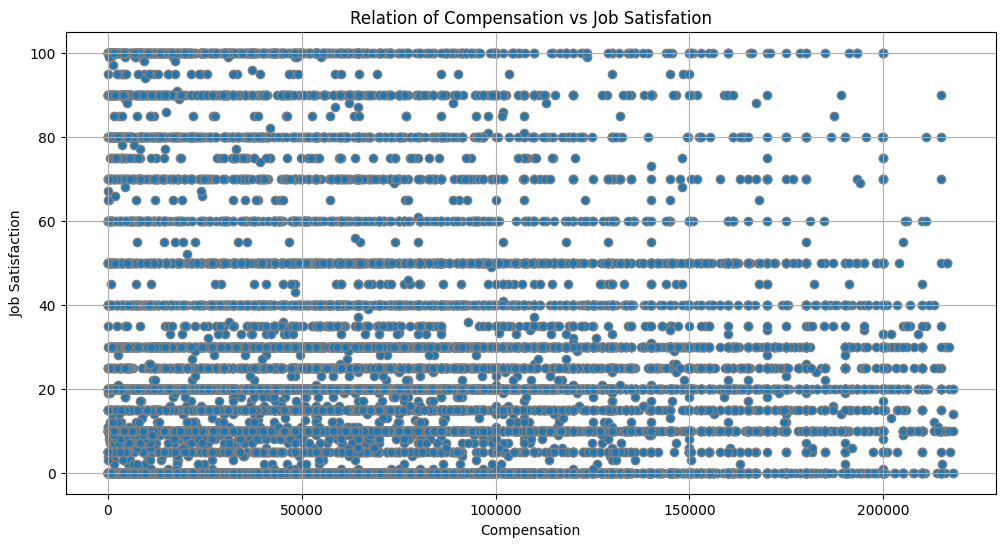

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(df_wo_out['ConvertedCompYearly'], df_wo_out['JobSatPoints_6'], marker='o', edgecolors='grey')
plt.title('Relation of Compensation vs Job Satisfation')
plt.xlabel('Compensation')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [11]:
## Write your code here
!pip install seaborn
import seaborn as sns
df_filter = df[['Age', 'JobSatPoints_6']].dropna()
df_filter

,Age,JobSatPoints_6
1,35-44 years old,0.0
10,35-44 years old,25.0
12,35-44 years old,30.0
15,45-54 years old,0.0
18,25-34 years old,60.0
...,...,...
65178,45-54 years old,0.0
65218,25-34 years old,0.0
65265,18-24 years old,60.0
65351,25-34 years old,0.0


In [12]:
## using the variable map_age to turn column Age to numeric values
df_filter['Age'] = df_filter['Age'].map(map_age)

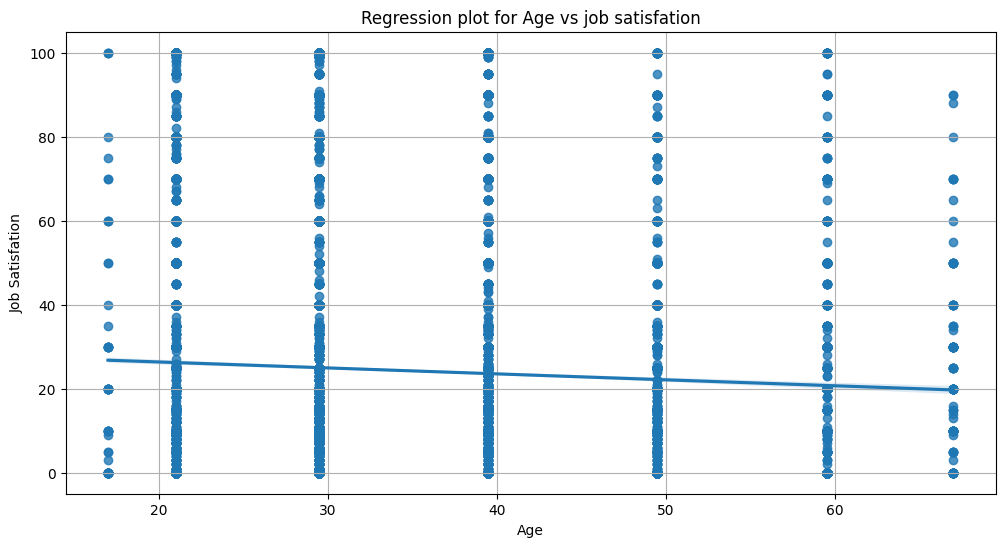

In [13]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df_filter, x='Age', y='JobSatPoints_6')
plt.title('Regression plot for Age vs job satisfation')
plt.xlabel('Age')
plt.ylabel('Job Satisfation')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [14]:
## Write your code here
df_filter = df[['Age', 'YearsCodePro']].dropna()
df_filter

,Age,YearsCodePro
1,35-44 years old,17
2,45-54 years old,27
6,35-44 years old,7
9,35-44 years old,11
11,45-54 years old,25
...,...,...
65428,25-34 years old,7
65431,45-54 years old,24
65432,18-24 years old,3
65434,25-34 years old,5


In [15]:
df_filter['Age'] = df_filter['Age'].map(map_age)

In [16]:
df_filter['YearsCodePro'].value_counts()

YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34                     169
38                     134
33             

In [17]:
df_filter['YearsCodePro'] = df_filter['YearsCodePro'].replace({'Less than 1 year':0.5, 'More than 50 years':51}).astype(int)

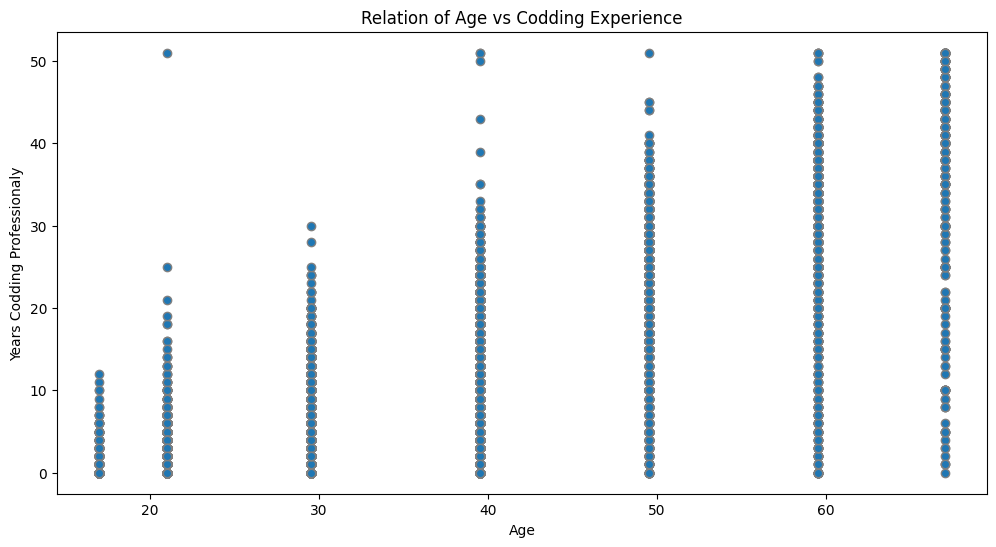

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(df_filter['Age'], df_filter['YearsCodePro'], marker='o', edgecolors='grey')
plt.title('Relation of Age vs Codding Experience')
plt.xlabel('Age')
plt.ylabel('Years Codding Professionaly')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [19]:
## Write your code here
df_filter = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()
df_filter

,Age,ConvertedCompYearly,JobSatPoints_6
72,18-24 years old,7322.0,65.0
379,35-44 years old,91295.0,0.0
389,25-34 years old,110000.0,20.0
392,35-44 years old,161044.0,30.0
398,45-54 years old,195000.0,30.0
...,...,...,...
41178,18-24 years old,9711.0,80.0
41180,25-34 years old,44640.0,0.0
41184,45-54 years old,170000.0,20.0
41186,18-24 years old,12000.0,20.0


In [20]:
##using map_age variable to turn Age to numeric values
df_filter['Age'] = df_filter['Age'].map(map_age)

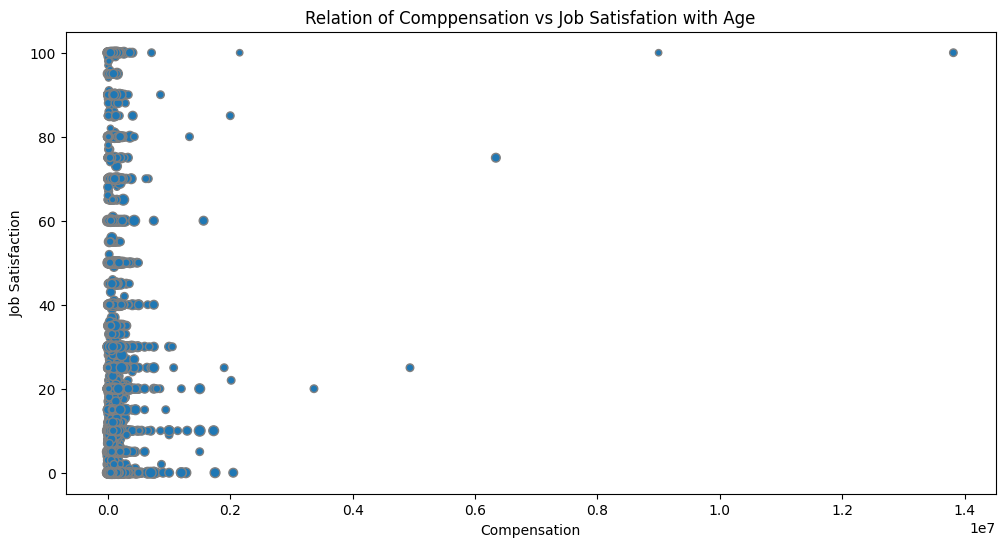

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(df_filter['ConvertedCompYearly'], df_filter['JobSatPoints_6'], s=df_filter['Age'],edgecolors='grey')
plt.title('Relation of Comppensation vs Job Satisfation with Age')
plt.xlabel('Compensation')
plt.ylabel('Job Satisfaction')
plt.show()

In [22]:
##removing outliers
q1 = df_filter['ConvertedCompYearly'].quantile(0.25)
q3 = df_filter['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1
bound_low = q1 - 1.5*iqr
bound_hig = q3 + 1.5*iqr
df_wo_out = df_filter[(df_filter['ConvertedCompYearly'] <=bound_hig) & (df_filter['ConvertedCompYearly']>=bound_low)]

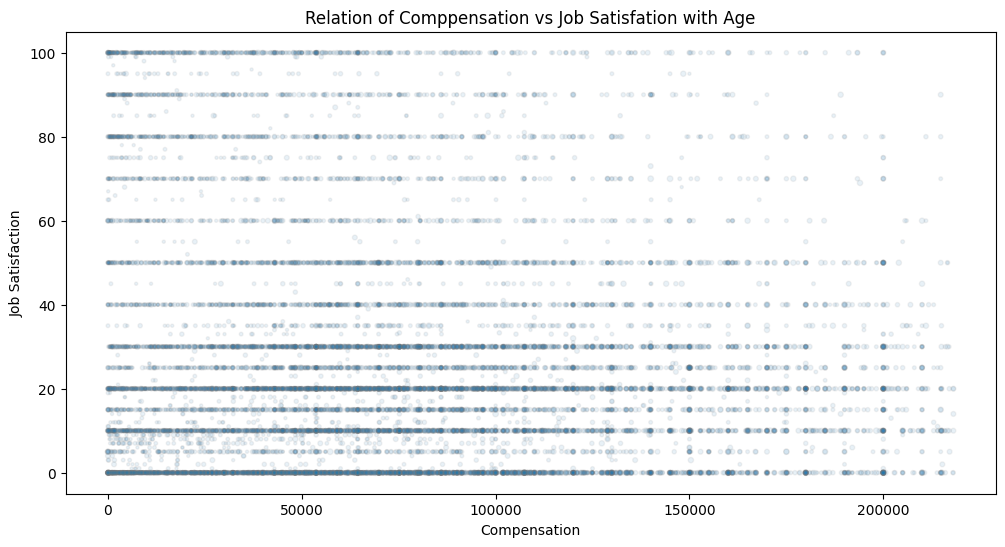

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(df_wo_out['ConvertedCompYearly'], df_wo_out['JobSatPoints_6'], s=df_wo_out['Age'], edgecolors='grey', alpha=.1, marker='.')
plt.title('Relation of Comppensation vs Job Satisfation with Age')
plt.xlabel('Compensation')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [24]:
## Write your code here
df_filter = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].dropna()
df_filter.head()

,LanguageHaveWorkedWith,JobSatPoints_6
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,0.0
10,JavaScript;Python;Ruby,25.0
12,Bash/Shell (all shells);C#;JavaScript;PowerShe...,30.0
15,C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScri...,0.0
18,C#;HTML/CSS;JavaScript;PHP;Python;SQL,60.0


In [25]:
df_filter['LanguageHaveWorkedWith'] = df_filter['LanguageHaveWorkedWith'].str.split(';')
df_expl = df_filter.explode('LanguageHaveWorkedWith')
df_expl['LanguageHaveWorkedWith'] = df_expl['LanguageHaveWorkedWith'].str.strip()
df_expl.head()

,LanguageHaveWorkedWith,JobSatPoints_6
1,Bash/Shell (all shells),0.0
1,Go,0.0
1,HTML/CSS,0.0
1,Java,0.0
1,JavaScript,0.0


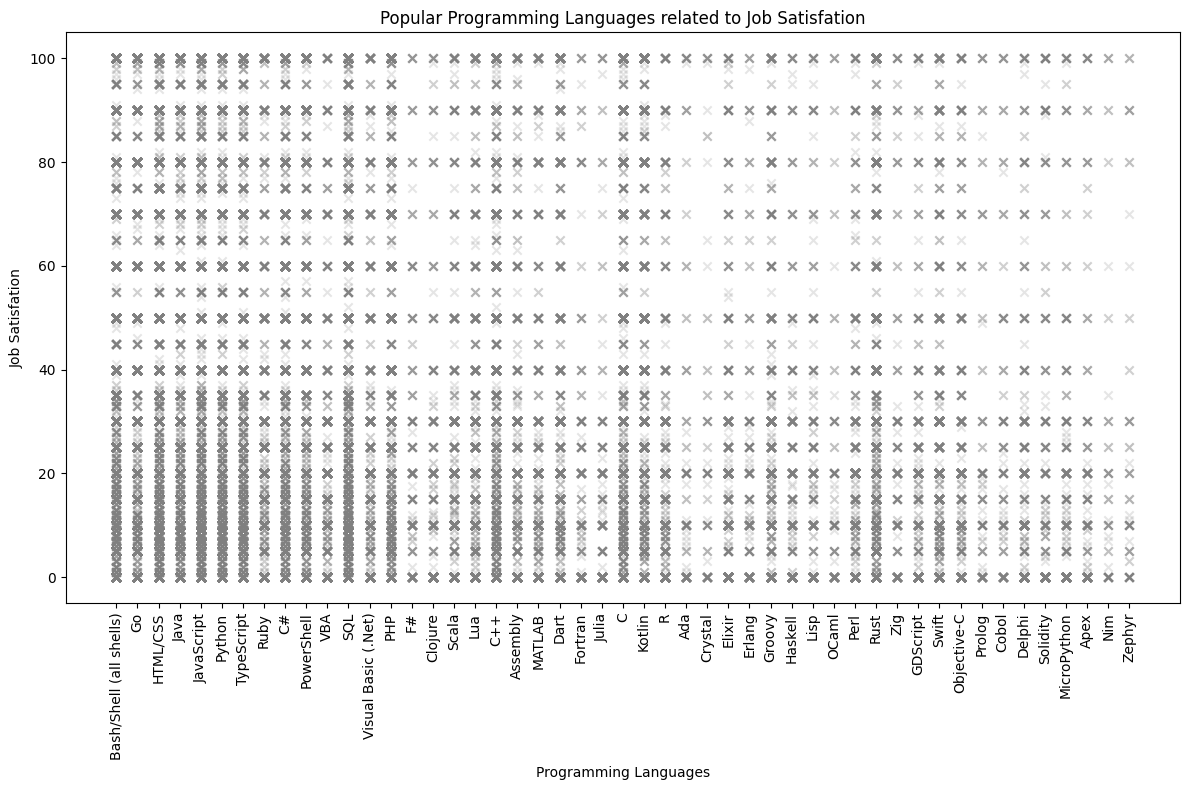

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(df_expl['LanguageHaveWorkedWith'], df_expl['JobSatPoints_6'], marker='x', facecolor='grey', alpha=.2)
plt.title('Popular Programming Languages related to Job Satisfation')
plt.xlabel('Programming Languages')
plt.ylabel('Job Satisfation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [60]:
## Write your code here
df_filter = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()
df_filter.head()

,ConvertedCompYearly,JobSatPoints_6,Employment
72,7322.0,65.0,"Employed, full-time;Student, full-time;Indepen..."
379,91295.0,0.0,"Employed, full-time"
389,110000.0,20.0,"Employed, full-time;Student, part-time"
392,161044.0,30.0,"Employed, full-time"
398,195000.0,30.0,"Employed, full-time"


In [61]:
df_filter['Employment'].unique()

array(['Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time', 'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time',
       'Student, part-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Not employed, but looking for work', 'Employed, part-time',
       'Student, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Employed, full-time;Employed, part-time',
       'Independent contr

In [62]:
df_filter['Employment'] = df_filter['Employment'].str.split(';')
df_expl = df_filter.explode('Employment')
df_expl['Employment'] = df_expl['Employment'].str.strip()
df_expl['Employment'].unique()

array(['Employed, full-time', 'Student, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time', 'Student, part-time',
       'Not employed, but looking for work', 'Retired',
       'Not employed, and not looking for work'], dtype=object)

In [63]:
##removing outliers
q1 = df_expl['ConvertedCompYearly'].quantile(0.25)
q3 = df_expl['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1
bound_low = q1 - 1.5*iqr
bound_hig = q3 + 1.5*iqr
df_wo_out = df_expl[(df_expl['ConvertedCompYearly'] <=bound_hig) & (df_expl['ConvertedCompYearly']>=bound_low)]

In [64]:
palette = sns.color_palette("hsv", len(df_wo_out['Employment'].unique()))
colors = {param: palette[i] for i, param in enumerate(df_wo_out['Employment'].unique())}
scatter_colors = [colors[p] for p in df_wo_out['Employment']]
handles = [plt.Line2D([0], [0], marker='o', color='w', label=param,
                       markerfacecolor=colors[param], markersize=10) for param in df_wo_out['Employment'].unique()]

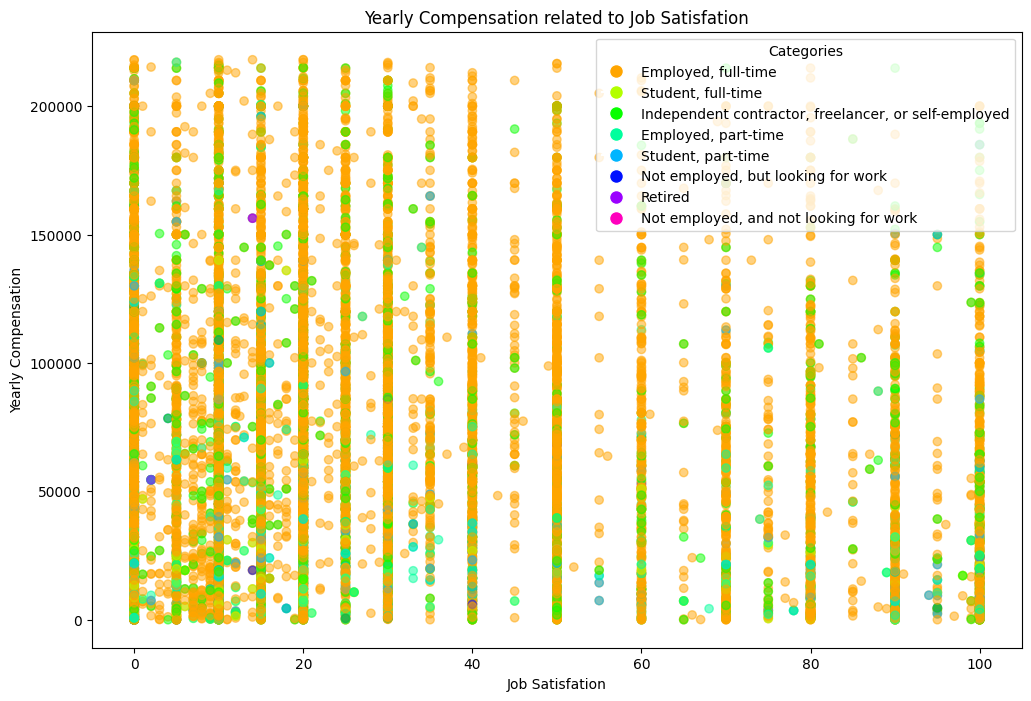

In [68]:
plt.figure(figsize=(12, 8))
plt.scatter(df_wo_out['JobSatPoints_6'], df_wo_out['ConvertedCompYearly'], c=scatter_colors, alpha=.5)
plt.title('Yearly Compensation related to Job Satisfation')
plt.xlabel('Job Satisfation')
plt.ylabel('Yearly Compensation')
plt.legend(handles=handles, title='Categories')
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [80]:
## Write your code here
df_filter = df[['YearsCodePro', 'Age', 'Country']].dropna()
df_filter.head()

,YearsCodePro,Age,Country
1,17,35-44 years old,United Kingdom of Great Britain and Northern I...
2,27,45-54 years old,United Kingdom of Great Britain and Northern I...
6,7,35-44 years old,United States of America
9,11,35-44 years old,Serbia
11,25,45-54 years old,Poland


In [81]:
df_filter['YearsCodePro'].value_counts()

YearsCodePro
2                     4041
3                     3949
5                     3433
10                    3187
4                     3121
6                     2766
Less than 1 year      2758
1                     2542
8                     2493
7                     2476
12                    1739
15                    1596
20                    1530
9                     1470
11                    1290
13                    1108
14                    1061
25                     977
16                     928
18                     851
17                     797
30                     679
24                     622
19                     509
22                     488
23                     446
26                     421
21                     375
27                     374
28                     341
35                     282
29                     195
32                     193
40                     192
34                     167
38                     133
33             

In [82]:
df_filter['YearsCodePro'] = df_filter['YearsCodePro'].replace({'More than 50 years':51, 'Less than 1 year':0.5}).astype('float')

In [84]:
df_filter['Age'].value_counts()

Age
25-34 years old       20155
35-44 years old       12869
18-24 years old        8940
45-54 years old        5386
55-64 years old        2116
65 years or older       432
Under 18 years old      375
Prefer not to say       121
Name: count, dtype: int64

In [85]:
map_age = {
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '25-34 years old': 29.5,
    '55-64 years old': 59.5,
    '18-24 years old': 21,
    'Prefer not to say': np.nan,
    '65 years or older': 67,
    'Under 18 years old': 17
}
df_filter['Age'] = df_filter['Age'].map(map_age)

In [86]:
df_filter['Country'].value_counts()

Country
United States of America                                9572
Germany                                                 4315
India                                                   3315
United Kingdom of Great Britain and Northern Ireland    2784
Ukraine                                                 2410
                                                        ... 
Haiti                                                      1
Nauru                                                      1
Chad                                                       1
Solomon Islands                                            1
Liberia                                                    1
Name: count, Length: 180, dtype: int64

In [87]:
df_filter['Country'].unique()

array(['United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Serbia', 'Poland', 'Bulgaria',
       'Switzerland', 'India', 'Germany', 'Ireland', 'Italy', 'Ukraine',
       'Philippines', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Netherlands', 'Croatia', 'Sweden',
       'Pakistan', 'Czech Republic', 'Republic of North Macedonia',
       'Finland', 'Slovakia', 'Greece', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'Singapore', 'China', 'Lebanon', 'Spain',
       'Canada', 'Russian Federation', 'South Africa', 'Lithuania',
       'Viet Nam', 'Dominican Republic', 'Kosovo', 'Morocco', 'Taiwan',
       'Georgia', 'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria',
       'Liechtenstein', 'Denmark', 'Ecuador', 'Malaysia', 'Albania',
       'Israel', 'Azerbaijan', 'Chile', 'Ghana', 'A

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
